## Plot APEX vs. HLS predicted biomass across space and time

#### Load required packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

#### Define input/output paths

In [2]:
# path to .csv file of joined and summarized APEX and HLS biomass predictions at plot scale
apex_hls_f = 'C:/SPK_local/for_others/Liwang_APEX_compare/apex_sim_daily_pasture_with_HLS_pred_1605.csv'
vor_seas_f = 'data/cper_vor_june_oct_2013_2021.csv'
vor_wkly_f = 'data/cper_vor_wkly_2013_2021.csv'

# output directory
outDIR = 'figures/'

#### Read in datasets and prep for plotting

In [3]:
df_out_apex = pd.read_csv(apex_hls_f)
df_out_seas = pd.read_csv(vor_seas_f)
df_out_wkly = pd.read_csv(vor_wkly_f)
df_out_apex['Date'] = pd.to_datetime(df_out_apex['Date'])
df_out_seas['Date'] = pd.to_datetime(df_out_seas['Date'])
df_out_wkly['Date'] = pd.to_datetime(df_out_wkly['Date'])
df_out_all = pd.concat([df_out_seas, df_out_wkly])

C:\Users\sean.kearney\.conda\envs\py_geo_env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Plot APEX vs. HLS vs. VOR for each pasture/year combo

In [4]:
# create necessary directory if it does not exist
if not os.path.exists(os.path.join(outDIR, 'APEX_v_HLS_v_VOR_1905')):
    os.mkdir(os.path.join(outDIR, 'APEX_v_HLS_v_VOR_1905'))

# iterate through pastures and plot all years as separate panels
for past in df_out_all['Pasture'].unique():
    fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=False, figsize=(12, 9),
                            gridspec_kw={'hspace': 0.5})
    #for idx, yr in enumerate(df_out_all[df_out_all['Pasture'] == past]['Year'].sort_values().unique()):
    for idx, yr in enumerate(df_out_apex['Date'].dt.year.unique()):
        df_plot_tmp = df_out_all[(df_out_all['Year'] == yr) &
                   (df_out_all['Pasture'] == past)].groupby('Date')['bm'].aggregate(['mean', 'std']).reset_index()
        #sns.lineplot(data=df_out_apex[(df_out_apex['Date'].dt.year == yr) & (df_out_apex['Pasture'] == past)],
        #                   x='Date', y='STL_ALL', ci=None, color='green', ax=axs.flatten()[idx])
        sns.lineplot(data=df_out_apex[(df_out_apex['Date'].dt.year == yr) & (df_out_apex['Pasture'] == past)],
                     x='Date', y='STL_ALL_1905', ci=None, color='green', linestyle='dashed', ax=axs.flatten()[idx])
        sns.lineplot(data=df_out_apex[(df_out_apex['Date'].dt.year == yr) & (df_out_apex['Pasture'] == past)],
                           x='Date', y='Biomass_plot_mean_ALL', color='orange', ci=None, ax=axs.flatten()[idx])
        axs.flatten()[idx].errorbar(x=df_plot_tmp['Date'], y=df_plot_tmp['mean'], yerr=df_plot_tmp['std'],
                     capsize=2, fmt='o', color='b')
        axs.flatten()[idx].set_xlabel('')
        axs.flatten()[idx].set_xlim(datetime.date(yr, 5, 1), datetime.date(yr, 11, 1))
        axs.flatten()[idx].xaxis.set_major_formatter(DateFormatter("%b"))
        axs.flatten()[idx].set_title(yr)
    handles = axs.flatten()[0].get_lines()
    labels = ['1905', 'HLS']
    fig.legend(handles, labels, loc='upper left')
    fig.suptitle(past, fontsize=16, fontweight='bold')
    plt.savefig(os.path.join(outDIR, 'APEX_v_HLS_v_VOR_1905', 'CPER_Biomass_APEX_v_HLS_v_VOR_plot_' + past + '.png'), dpi=200)
    plt.close()

#### Plot difference between APEX and HLS by year and by pasture

In [15]:
# calculate difference
df_out_apex['apex_minus_hls'] = df_out_apex['STL_ALL_1905'] - df_out_apex['Biomass_plot_mean_ALL']

# calculate absolute difference for total 'error'
df_out_apex['mod_diff'] = df_out_apex['apex_minus_hls'].apply(lambda x: np.abs(x))

# create year column for plotting
df_out_apex['Year'] = df_out_apex['Date'].dt.year

# create day of year column for plotting
df_out_apex['yday'] = df_out_apex['Date'].dt.dayofyear

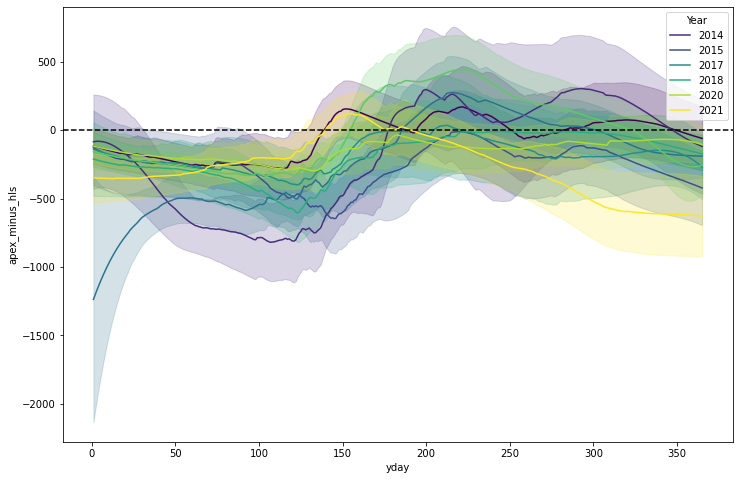

In [26]:
# plot by year, averaged over pastures
plt.figure(figsize=(12, 8))
sns.lineplot(x='yday', y='apex_minus_hls', hue='Year', ci='sd', data=df_out_apex, palette='viridis')
plt.axhline(y=0, c='black', linestyle='dashed')

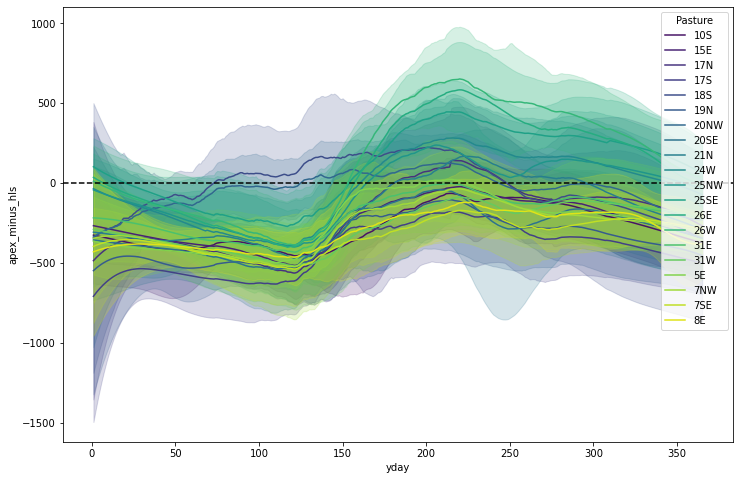

In [27]:
# plot by pasture, averaged over years
plt.figure(figsize=(12, 8))
sns.lineplot(x='yday', y='apex_minus_hls', hue='Pasture', ci='sd', data=df_out_apex, palette='viridis')
plt.axhline(y=0, c='black', linestyle='dashed')